# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np


from sklearn import metrics

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
pima_df=pd.read_csv('pima-indians-diabetes+(3).csv')
# url for data description https://www.kaggle.com/uciml/pima-indians-diabetes-database

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
603,7,150,78,29,126,35.2,0.692,54,1
736,0,126,86,27,120,27.4,0.515,21,0
111,8,155,62,26,495,34.0,0.543,46,1
369,1,133,102,28,140,32.8,0.234,45,1
156,2,99,52,15,94,24.6,0.637,21,0
268,0,102,52,0,0,25.1,0.078,21,0
299,8,112,72,0,0,23.6,0.840,58,0
518,13,76,60,0,0,32.8,0.180,41,0
237,0,179,90,27,0,44.1,0.686,23,1
38,2,90,68,42,0,38.2,0.503,27,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print('The datatyoes of each column is :','\n',pima_df.dtypes)

The datatyoes of each column is : 
 Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [5]:
print('The shape of dataset is:',pima_df.shape)

The shape of dataset is: (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [6]:
# preg ie pregnancies can be zero
# rows where glucose plasma is 0
pima_df[pima_df['Plas']==0] 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
#replacing with median
pima_df['Plas']=pima_df['Plas'].replace(0,pima_df['Plas'].median())

In [8]:
# now no 0 values in plas column
pima_df[pima_df['Plas']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [9]:
#similarly for pressure
pima_df[pima_df['Pres']==0] 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [10]:
pima_df['Pres']=pima_df['Pres'].replace(0,pima_df['Pres'].median())

In [11]:
pima_df[pima_df['Pres']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [12]:
# for skin thickness

In [13]:
pima_df[pima_df['skin']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,72,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
15,7,100,72,0,0,30.0,0.484,32,1
17,7,107,74,0,0,29.6,0.254,31,1
21,8,99,84,0,0,35.4,0.388,50,0


In [14]:
pima_df['skin']=pima_df['skin'].replace(0,pima_df['skin'].median())

In [15]:
pima_df[pima_df['skin']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [16]:
# For test ie insulin column


In [17]:
pima_df[pima_df['test']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
5,5,116,74,23,0,25.6,0.201,30,0
7,10,115,72,23,0,35.3,0.134,29,0
9,8,125,96,23,0,0.0,0.232,54,1
10,4,110,92,23,0,37.6,0.191,30,0
11,10,168,74,23,0,38.0,0.537,34,1
12,10,139,80,23,0,27.1,1.441,57,0
15,7,100,72,23,0,30.0,0.484,32,1


In [18]:
pima_df['test']=pima_df['test'].replace(0,pima_df['test'].median())

In [19]:
pima_df[pima_df['test']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [20]:
# For mass ie bmi column

In [21]:
pima_df[pima_df['mass']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
9,8,125,96,23,30.5,0.0,0.232,54,1
49,7,105,72,23,30.5,0.0,0.305,24,0
60,2,84,72,23,30.5,0.0,0.304,21,0
81,2,74,72,23,30.5,0.0,0.102,22,0
145,0,102,75,23,30.5,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,72,23,30.5,0.0,0.256,25,0
494,3,80,72,23,30.5,0.0,0.174,22,0
522,6,114,72,23,30.5,0.0,0.189,26,0
684,5,136,82,23,30.5,0.0,0.640,69,0


In [22]:
pima_df['mass']=pima_df['mass'].replace(0,pima_df['mass'].median())

In [23]:
pima_df[pima_df['mass']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [24]:
# For diabetes pedigree ie pedi-no zero values

In [25]:
pima_df[pima_df['pedi']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [26]:
# For age-no zero values

In [27]:
pima_df[pima_df['age']==0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


# Q5 Print the descriptive statistics of each & every column using describe() function

In [28]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

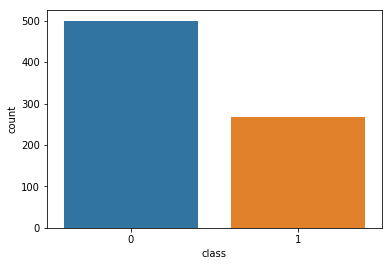

In [29]:
import seaborn as sns
sns.countplot(x='class', data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


D:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Python\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


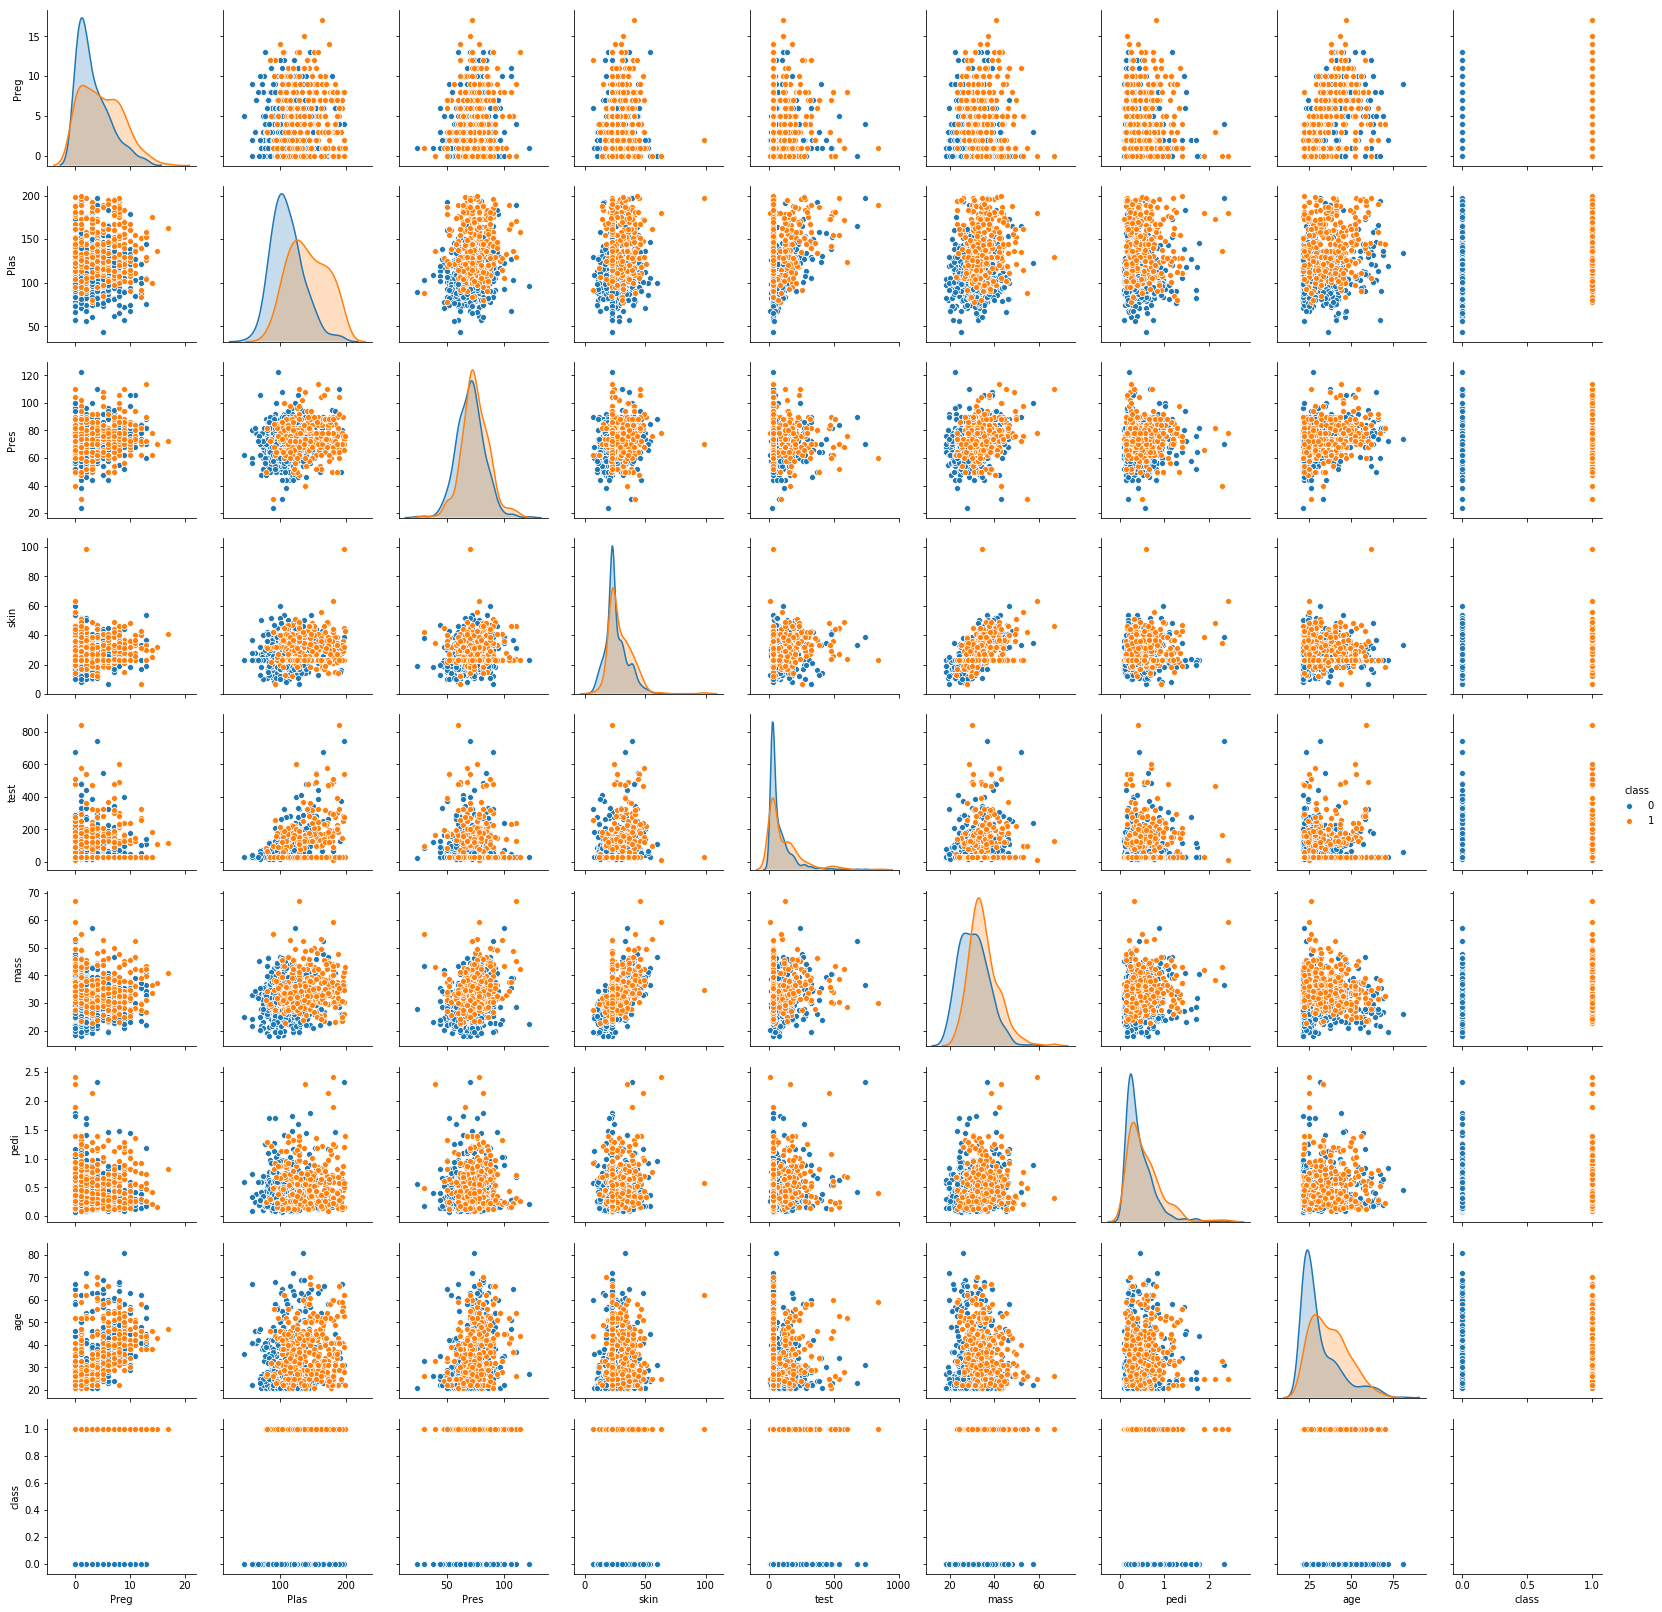

In [30]:
sns.pairplot(pima_df, hue='class')

In [32]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Using the plot - infer the relationship between different variables

#INFERENCES
#1) The women whose number of pregnancies> 8 are not diabetic.
#2) women who are not diabetic tend to have a higher plasma rate concentration.
#3) diabetic and non-diabetic women have almost similar blood pressure levels but some diabetic women tend to touch 120 blood pressure.
#4) the average diabetic women have skin thickness of 70mm and non-diabetic women tend to have the mean skin thickness greater than diabetic women which is close to 100.
#5) non diabetic women tend to have higher insulin levels than non-diabetic women.
#6) diabetic women have higher bmi as comapred to non diabetic
#7) people with age >60 do not have diabetes whereas most diabetic women are under the age of 45

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [33]:
X = pima_df.drop("class", axis=1)
y = pima_df.pop("class")

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [35]:
from sklearn.tree import DecisionTreeClassifier
dm=DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [36]:
dm.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [39]:
y_predict = dm.predict(X_test)
print(dm.score(X_train , train_labels))
print(dm.score(X_test , test_labels))

0.7839851024208566
0.7792207792207793


In [40]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[129  17]
 [ 34  51]]


In [41]:
# another way to get accuracy if .score is not available for some classifier unlike decision tree
#sklearn.metrics.accuracy_score(test_labels, y_predict, normalize=True, sample_weight=None)

Print the feature importance of the decision model - Optional

In [42]:
print(dm.feature_importances_)

[0.01850185 0.49252037 0.01526786 0.         0.         0.27723773
 0.0426851  0.15378709]
